<a href="https://colab.research.google.com/github/YoshiAligina/Allstate1B/blob/main/allstate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this section we are importing necessary libraries to work on building our model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Importing our csv file and examining it.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/claims_data.csv')
df.head()


id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   
3  10    B    B    A    B    A    A    A    A    B  ...  0.440945  0.391128   
4  11    A    B    A    B    A    A    A    A    B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 132 columns]

In [ ]:
df.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

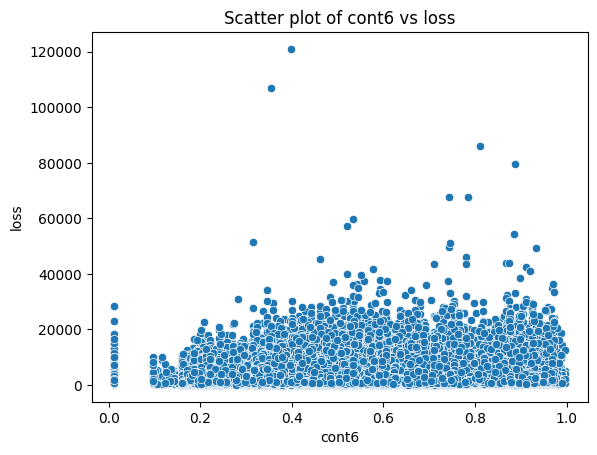

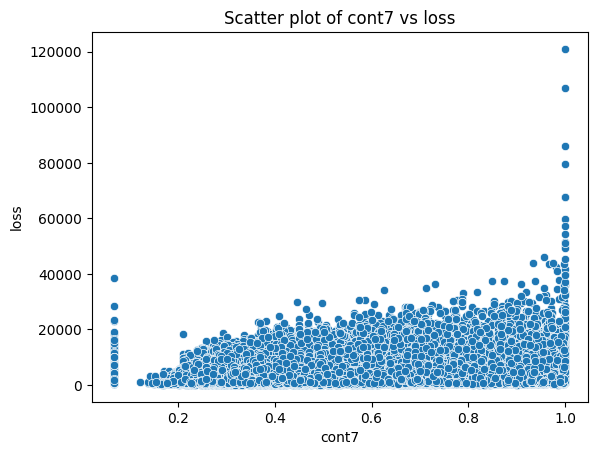

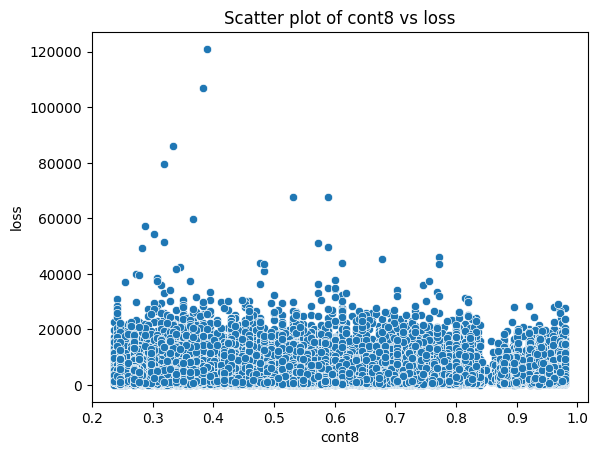

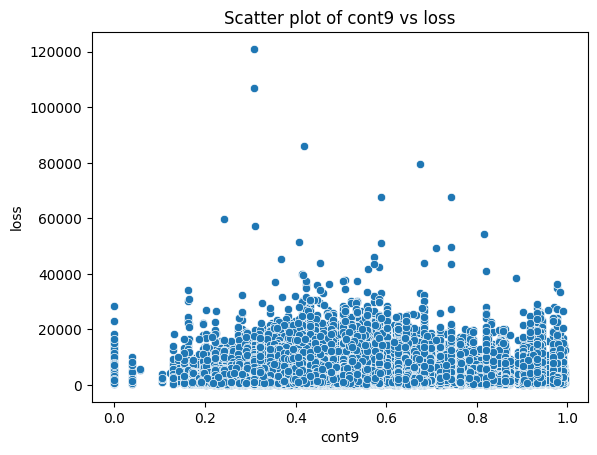

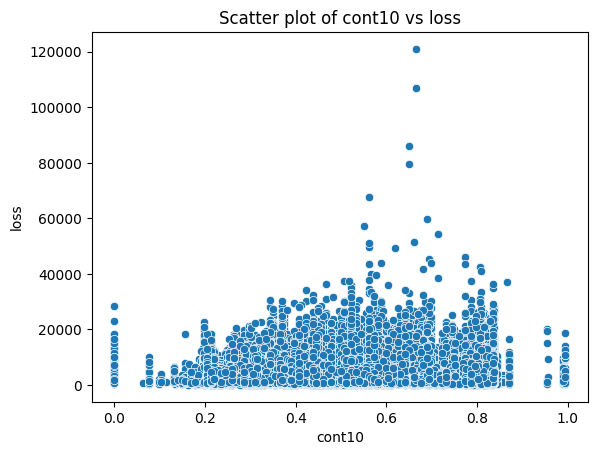

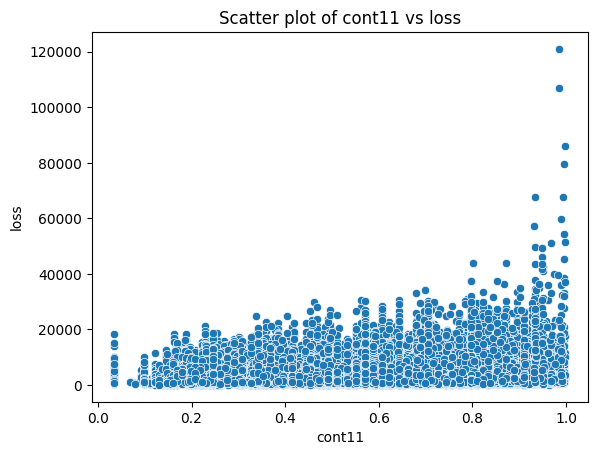

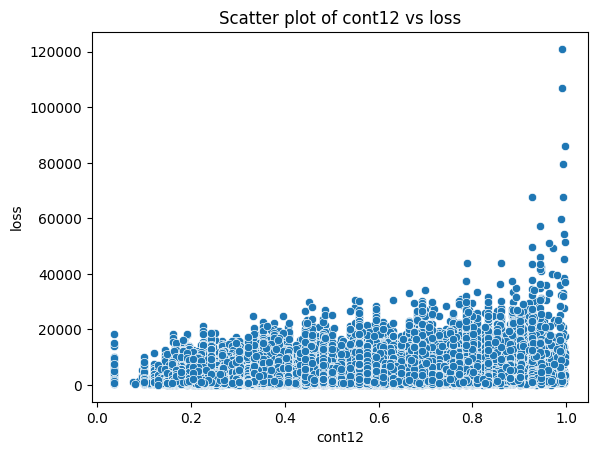

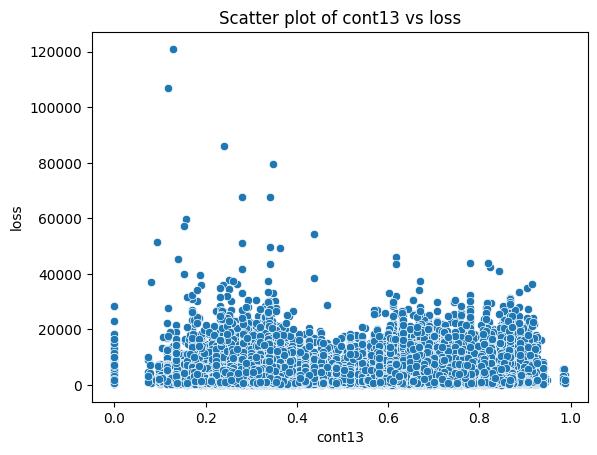

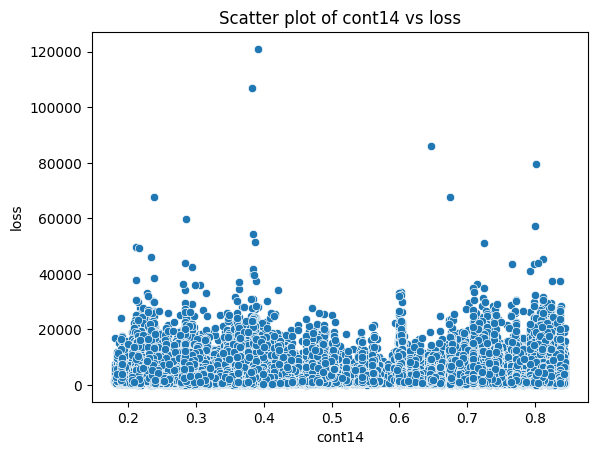

In [ ]:
label_column = "loss"
cont_feats =  ['cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14']
for feature in cont_feats:
    sns.scatterplot(x=feature, y=label_column, data=df)
    plt.title(f'Scatter plot of {feature} vs {label_column}')
    plt.xlabel(feature)
    plt.ylabel(label_column)
    plt.show()

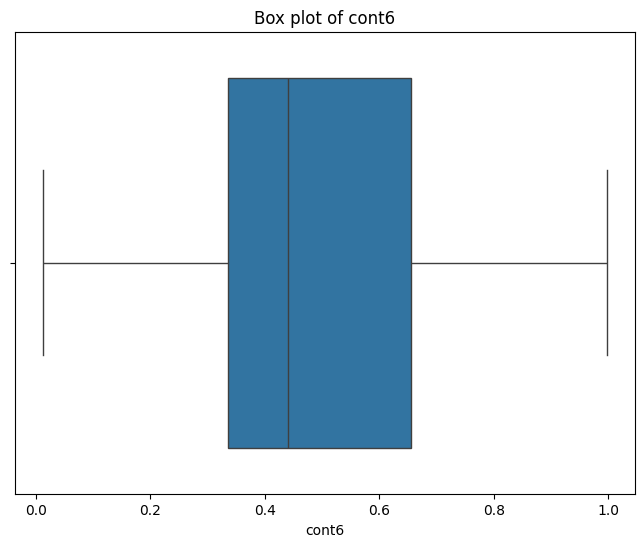

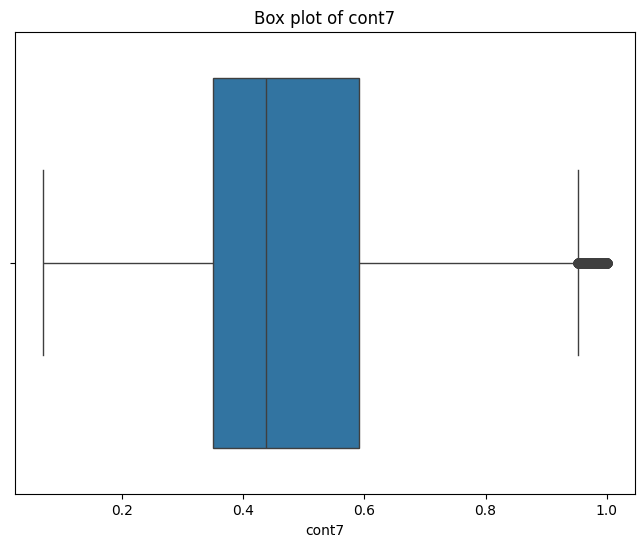

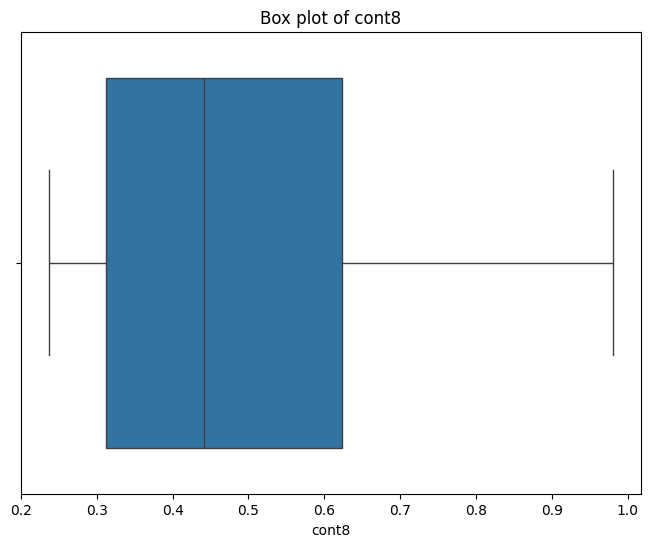

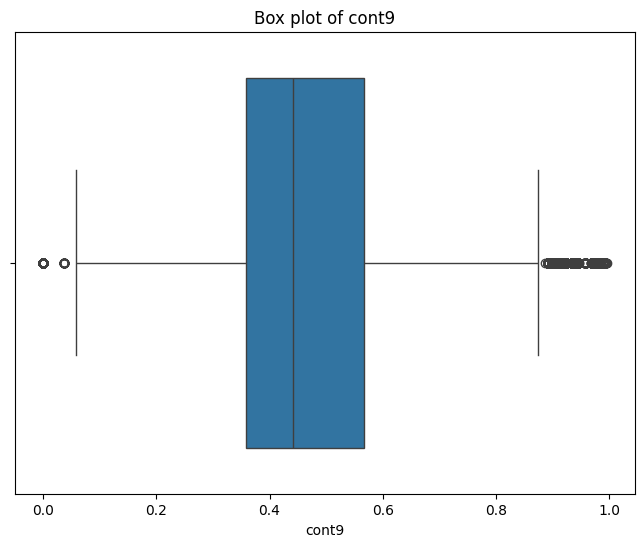

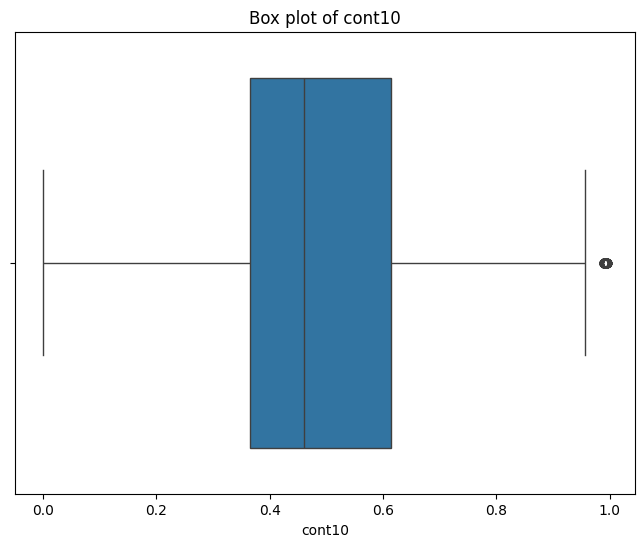

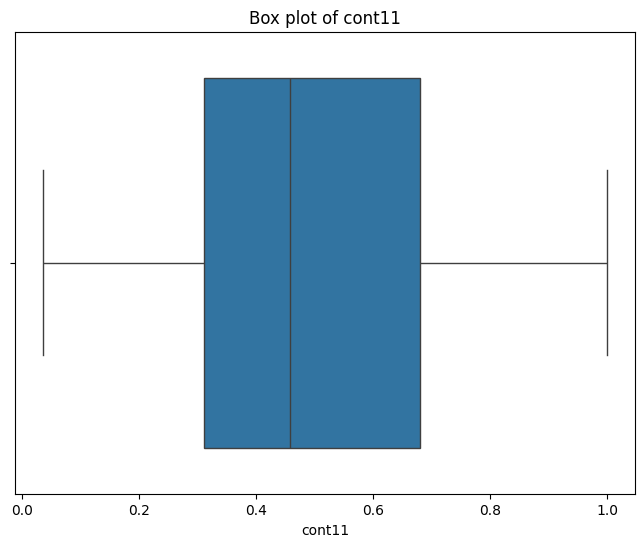

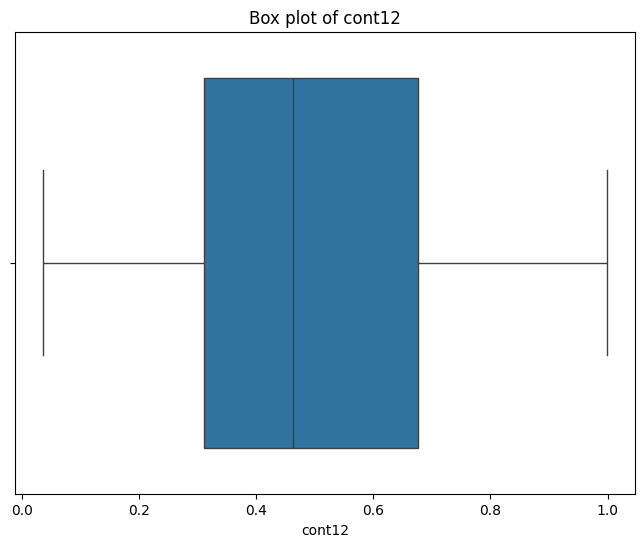

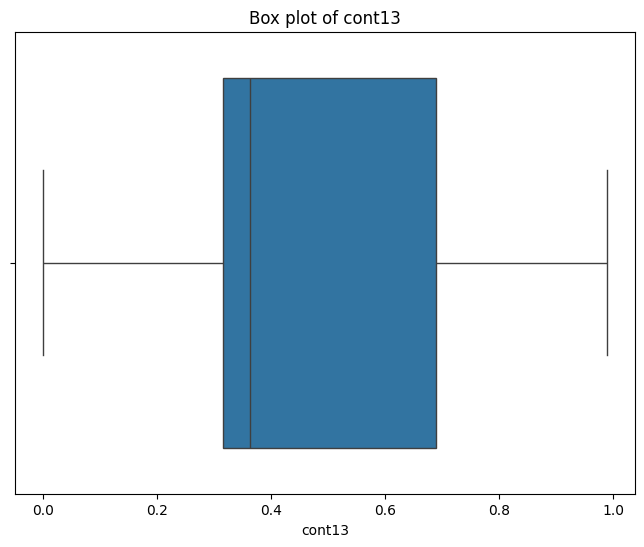

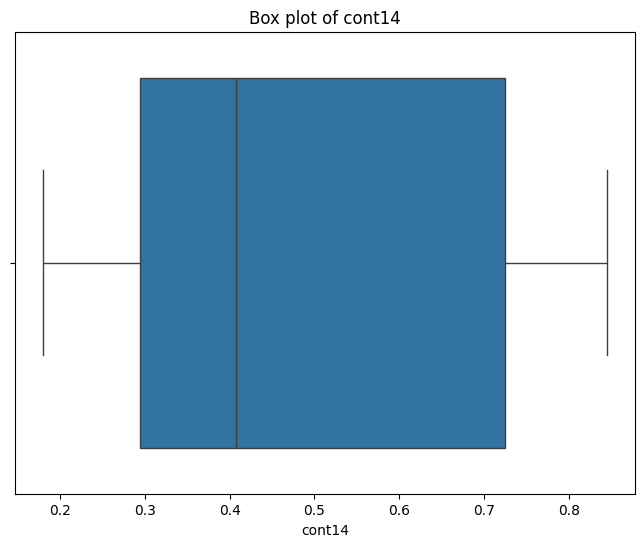

Outliers in cont6 using Z-score:
Empty DataFrame
Columns: [id, cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8, cat9, cat10, cat11, cat12, cat13, cat14, cat15, cat16, cat17, cat18, cat19, cat20, cat21, cat22, cat23, cat24, cat25, cat26, cat27, cat28, cat29, cat30, cat31, cat32, cat33, cat34, cat35, cat36, cat37, cat38, cat39, cat40, cat41, cat42, cat43, cat44, cat45, cat46, cat47, cat48, cat49, cat50, cat51, cat52, cat53, cat54, cat55, cat56, cat57, cat58, cat59, cat60, cat61, cat62, cat63, cat64, cat65, cat66, cat67, cat68, cat69, cat70, cat71, cat72, cat73, cat74, cat75, cat76, cat77, cat78, cat79, cat80, cat81, cat82, cat83, cat84, cat85, cat86, cat87, cat88, cat89, cat90, cat91, cat92, cat93, cat94, cat95, cat96, cat97, cat98, cat99, ...]
Index: []

[0 rows x 132 columns]
Outliers in cont7 using Z-score:
Empty DataFrame
Columns: [id, cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8, cat9, cat10, cat11, cat12, cat13, cat14, cat15, cat16, cat17, cat18, cat19, cat20, cat21, cat22, cat23,

In [ ]:
# Box plots for continuous features
for feature in cont_feats:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[feature])
  plt.title(f'Box plot of {feature}')
  plt.show()
for feature in cont_feats:
  z = np.abs(stats.zscore(df[feature]))
  # Threshold for identifying outliers
  threshold = 3 #Check for each varialbe individually.
  outliers = np.where(z > threshold)
  print(f"Outliers in {feature} using Z-score:")
  print(df.iloc[outliers])

# Using the Isolation Forest algorithm
for feature in cont_feats:
  model = IsolationForest()
  df['anomaly'] = model.fit_predict(df[[feature]])
  outliers = df[df['anomaly'] == -1]
  print(f"Outliers in {feature} using Isolation Forest:")
  print(outliers)
  df.drop('anomaly', axis=1, inplace=True)

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)
y = df_encoded["loss"]
X = df_encoded.drop(columns=['id', 'loss'], axis=1)
# X
# y

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression


selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)


selected_indices = selector.get_support(indices=True)

selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)

X_kbest = X[selected_features]

Selected Features: Index(['cat10_B', 'cat12_A', 'cat12_B', 'cat57_A', 'cat57_B', 'cat79_B',
       'cat79_D', 'cat80_B', 'cat80_D', 'cat87_B'],
      dtype='object')


In [ ]:

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    mean_loss = df.groupby(column)['loss'].mean().reset_index()


    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y='loss', data=mean_loss, color='lightblue', label='Mean Loss')


    sns.lineplot(x=column, y='loss', data=df, color='red', marker='o', label='Actual Loss')

    plt.title(f'Bar Graph of Mean Loss with Actual Loss Line for {column}')
    plt.legend()
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

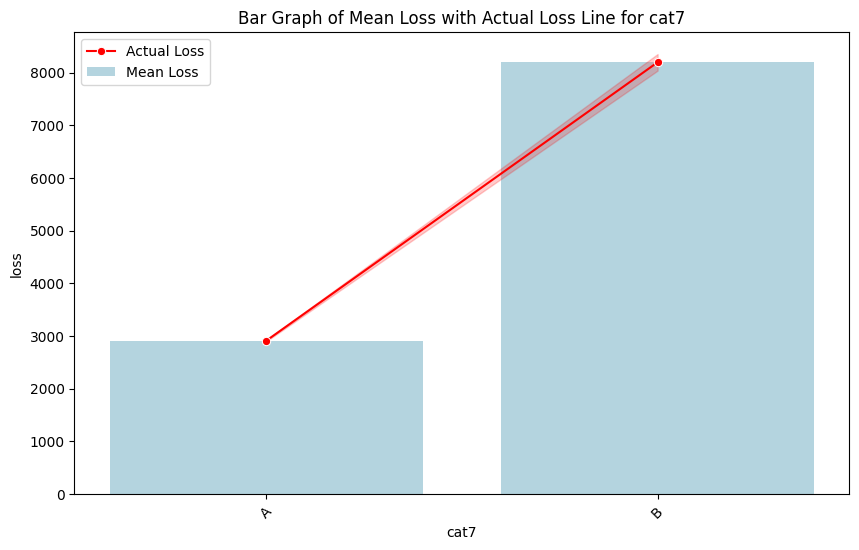

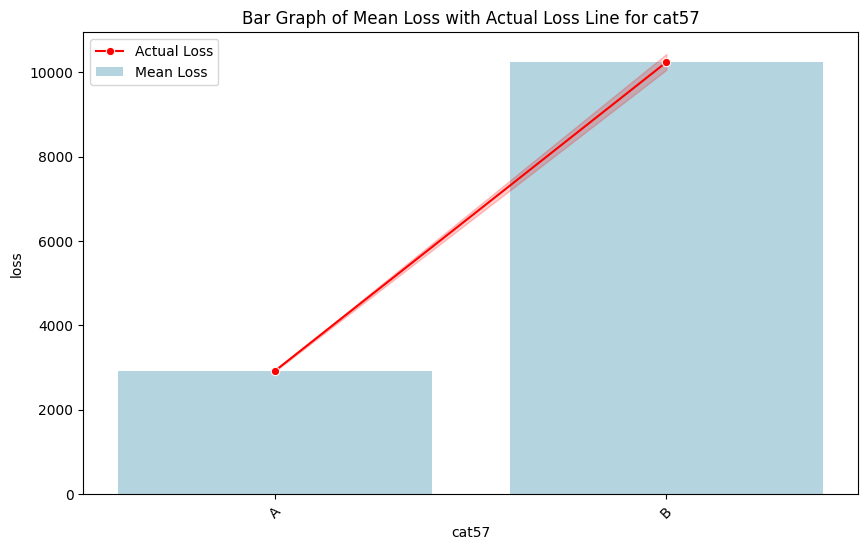

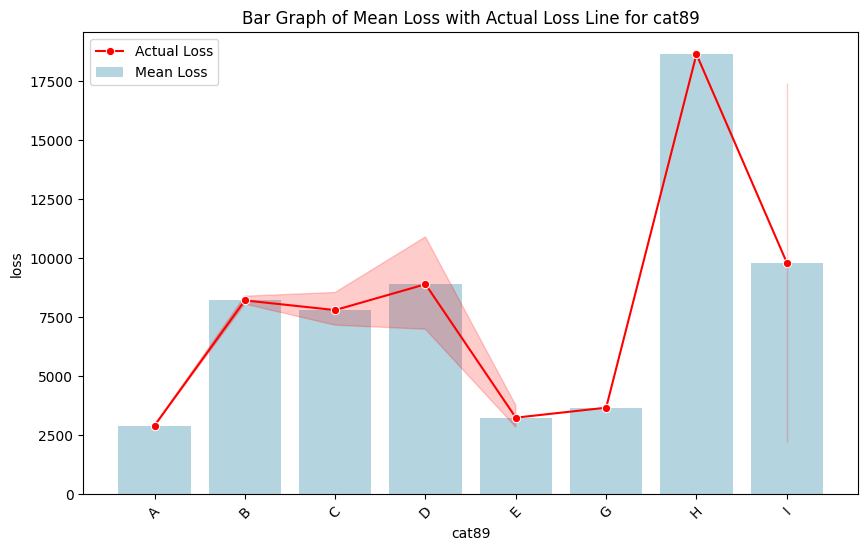

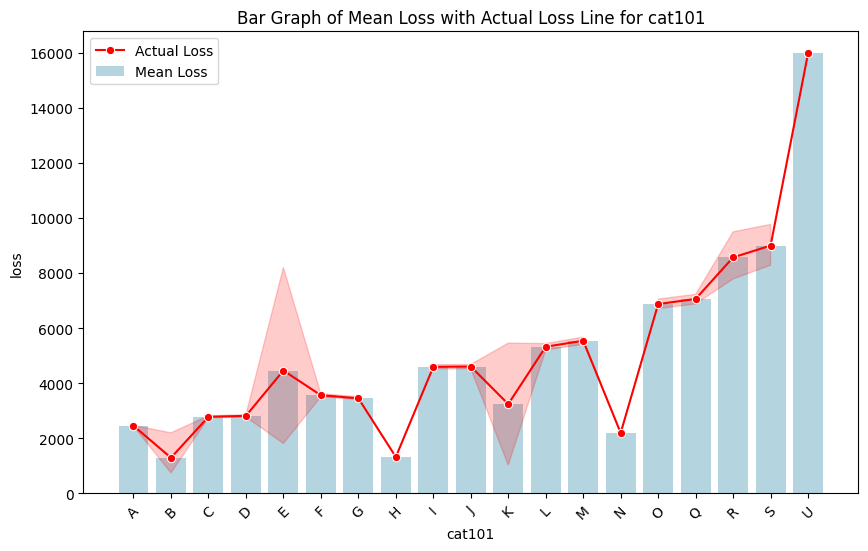

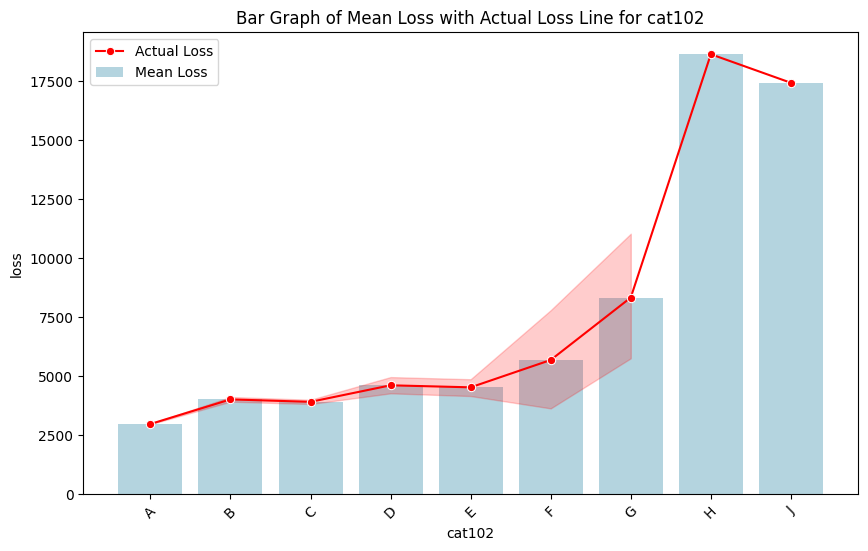

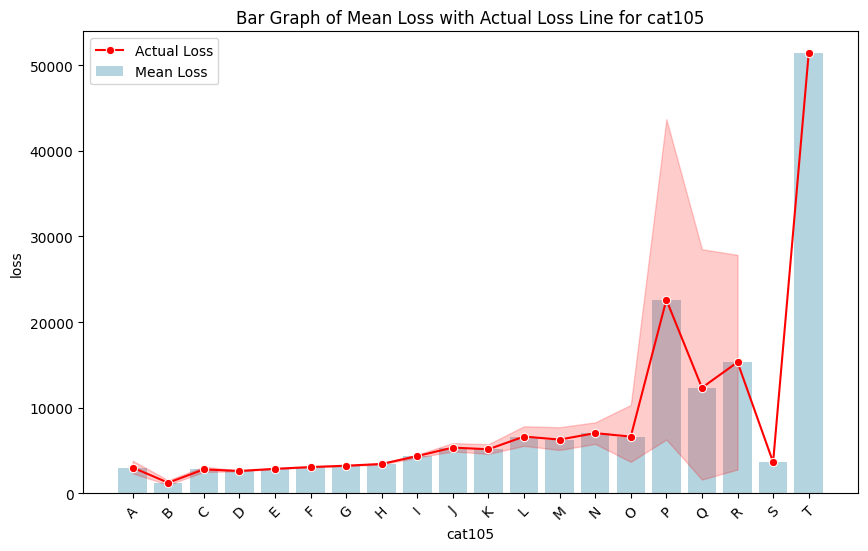

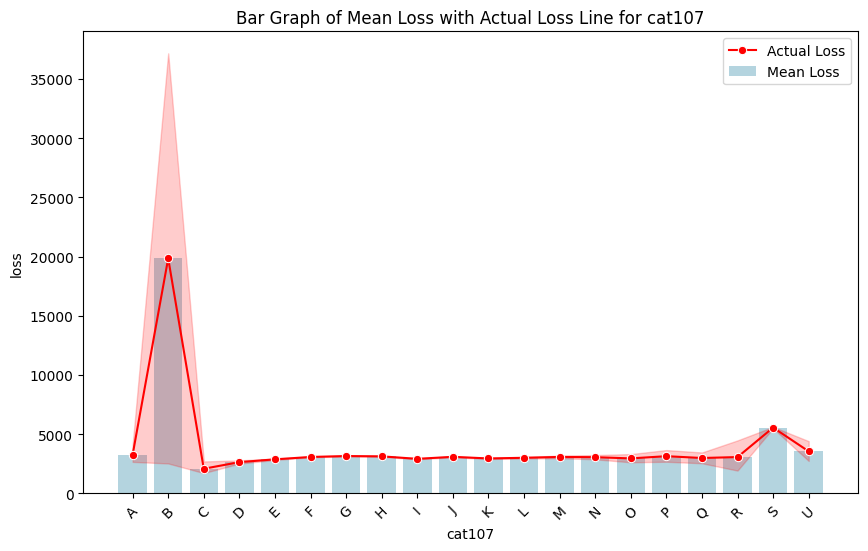

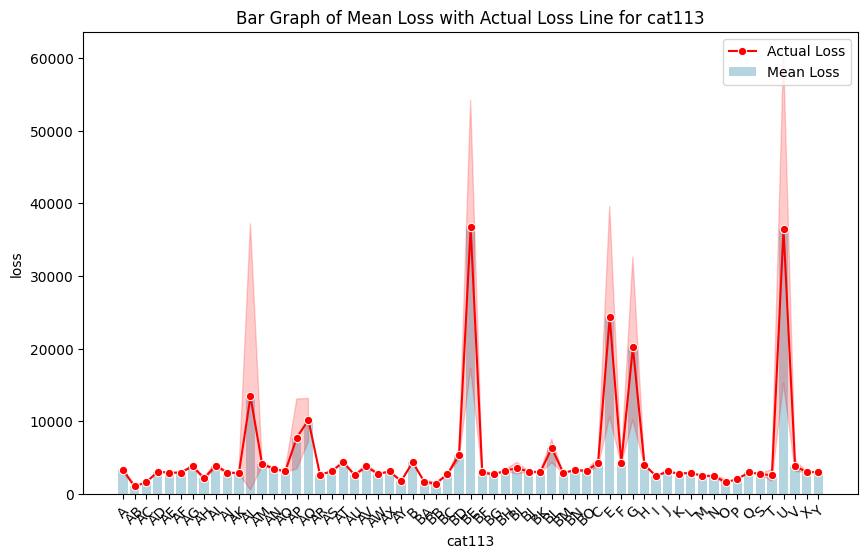

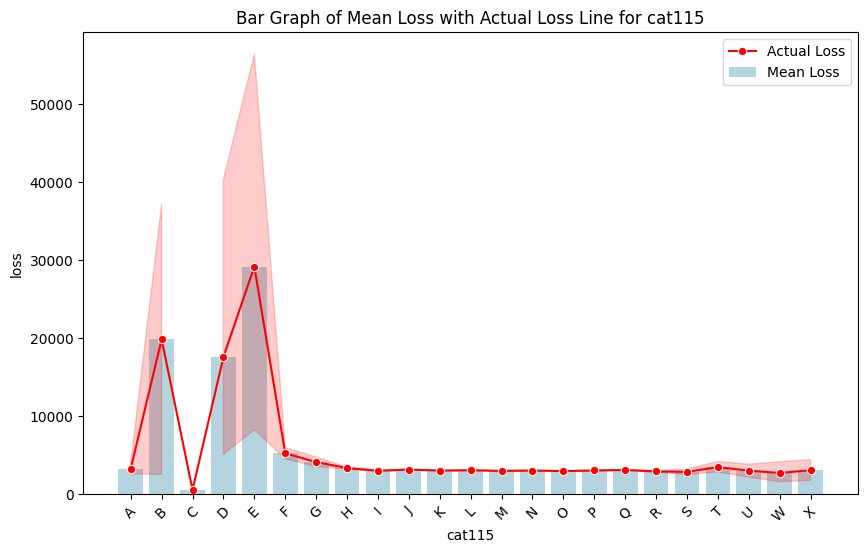

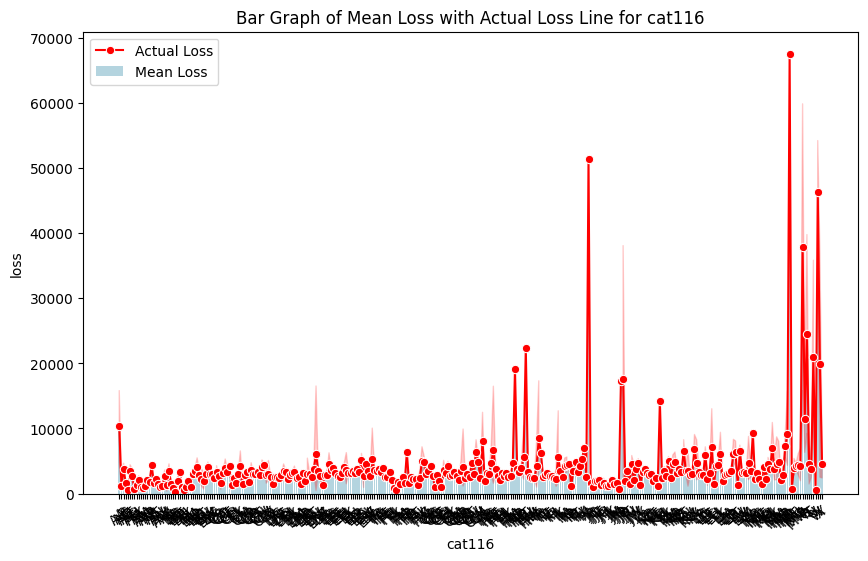

Categorical columns with significant differences in mean loss:
['cat7', 'cat57', 'cat89', 'cat101', 'cat102', 'cat105', 'cat107', 'cat113', 'cat115', 'cat116']


In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

significant_difference_columns = []

for column in categorical_columns:

    mean_loss = df.groupby(column)['loss'].mean().reset_index()


    mean = mean_loss['loss'].mean()
    std_dev = mean_loss['loss'].std()
    cv = std_dev / mean if mean != 0 else 0

    threshold = 0.6

    if cv > threshold:
        significant_difference_columns.append(column)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=column, y='loss', data=mean_loss, color='lightblue', label='Mean Loss')

        sns.lineplot(x=column, y='loss', data=df, color='red', marker='o', label='Actual Loss')

        plt.title(f'Bar Graph of Mean Loss with Actual Loss Line for {column}')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()


print("Categorical columns with significant differences in mean loss:")
print(significant_difference_columns)

In [ ]:
columns_to_cluster = ["cat89","cat101", "cat102", "cat105", "cat107",'cat113','cat115','cat116']

new_columns = [col for col in significant_difference_columns if col not in columns_to_cluster]

print("Categorical columns with significant differences in mean loss to use:")
new_columns



Categorical columns with significant differences in mean loss to use:


['cat7', 'cat57']

In [ ]:
number_of_columns=len(new_columns)

number_of_columns

2

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

def encode_and_cluster(df, column_name, n_clusters=5):
    le = LabelEncoder()
    df[f'{column_name}_encoded'] = le.fit_transform(df[column_name])

    kmeans = KMeans(n_clusters=n_clusters)
    df[f'{column_name}_cluster'] = kmeans.fit_predict(df[[f'{column_name}_encoded']])

    df[f'{column_name}_grouped'] = df[f'{column_name}_cluster'].map(lambda x: f'Group{x}')

    return df



# columns_to_cluster = ["cat89", "cat92","cat99","cat101", "cat102", "cat105", "cat107",'cat109', 'cat110',"cat11",'cat112', 'cat113', 'cat114', 'cat115', 'cat116']


for column in columns_to_cluster:
    df = encode_and_cluster(df, column, n_clusters=5)


for column in columns_to_cluster:
    grouped_column = f'{column}_grouped'
    print(f"\nDistribution of {column} groups:")
    print(df[grouped_column].value_counts())



Distribution of cat89 groups:
cat89_grouped
Group1    183744
Group0      4312
Group2       220
Group4        38
Group3         4
Name: count, dtype: int64

Distribution of cat101 groups:
cat101_grouped
Group0    106724
Group4     34149
Group2     21084
Group3     17124
Group1      9237
Name: count, dtype: int64

Distribution of cat102 groups:
cat102_grouped
Group0    177274
Group2      5155
Group1      4929
Group3       511
Group4       449
Name: count, dtype: int64

Distribution of cat105 groups:
cat105_grouped
Group2    89022
Group0    62892
Group3    20613
Group1    14199
Group4     1592
Name: count, dtype: int64

Distribution of cat107 groups:
cat107_grouped
Group1    62707
Group2    52021
Group4    47310
Group0    16036
Group3    10244
Name: count, dtype: int64

Distribution of cat113 groups:
cat113_grouped
Group2    47278
Group1    39089
Group3    38285
Group0    35430
Group4    28236
Name: count, dtype: int64

Distribution of cat115 groups:
cat115_grouped
Group0    59991
Group4

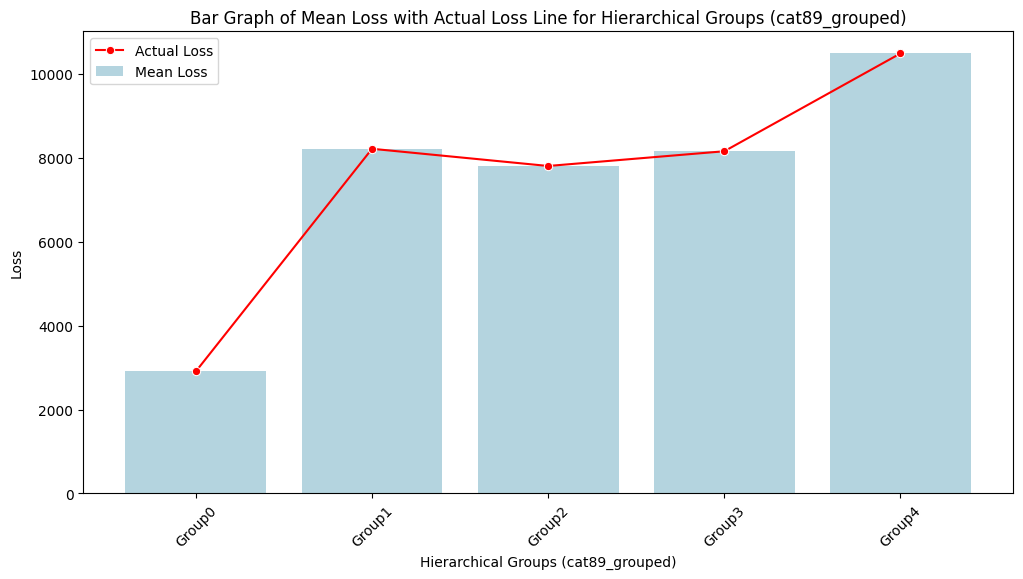

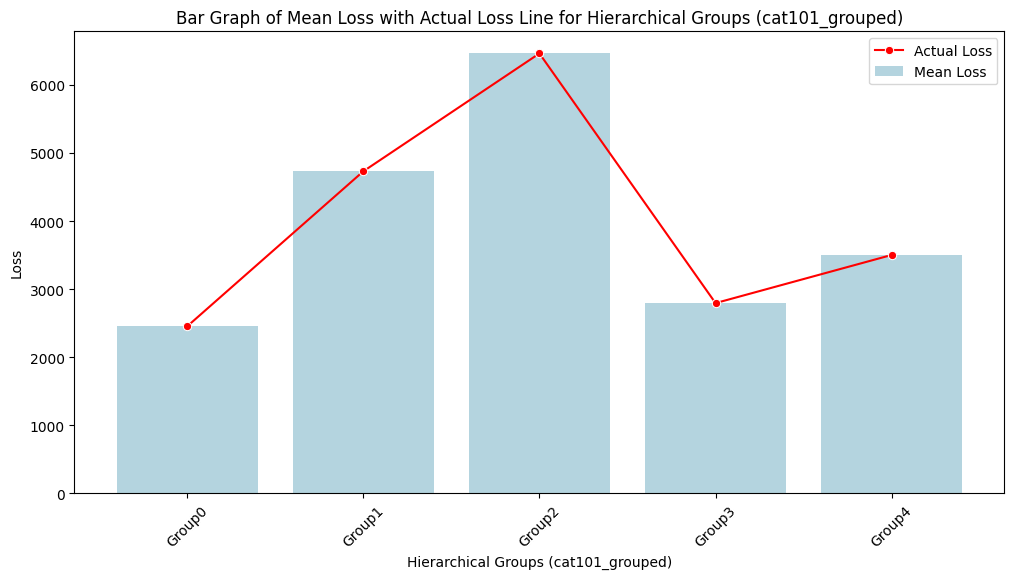

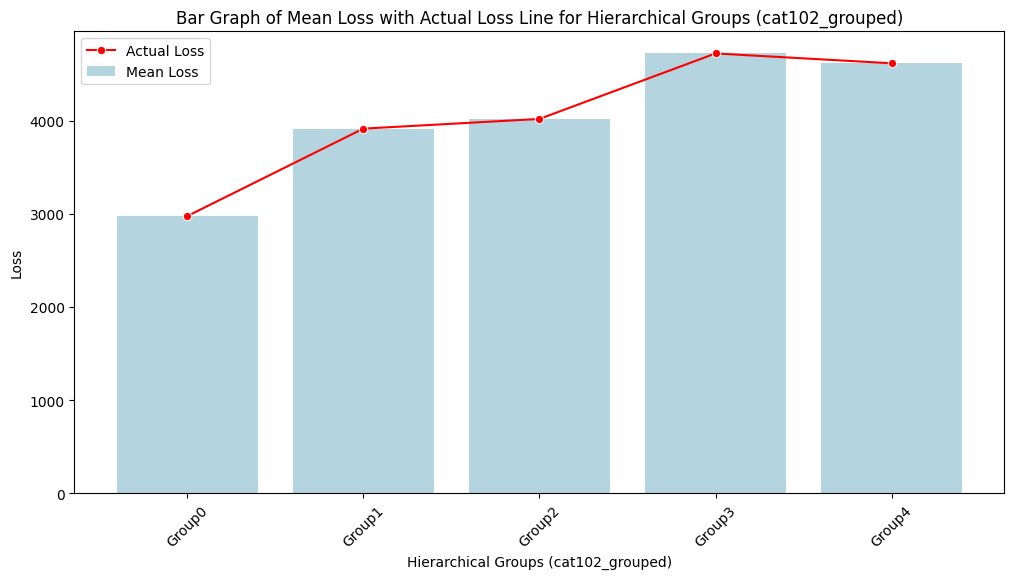

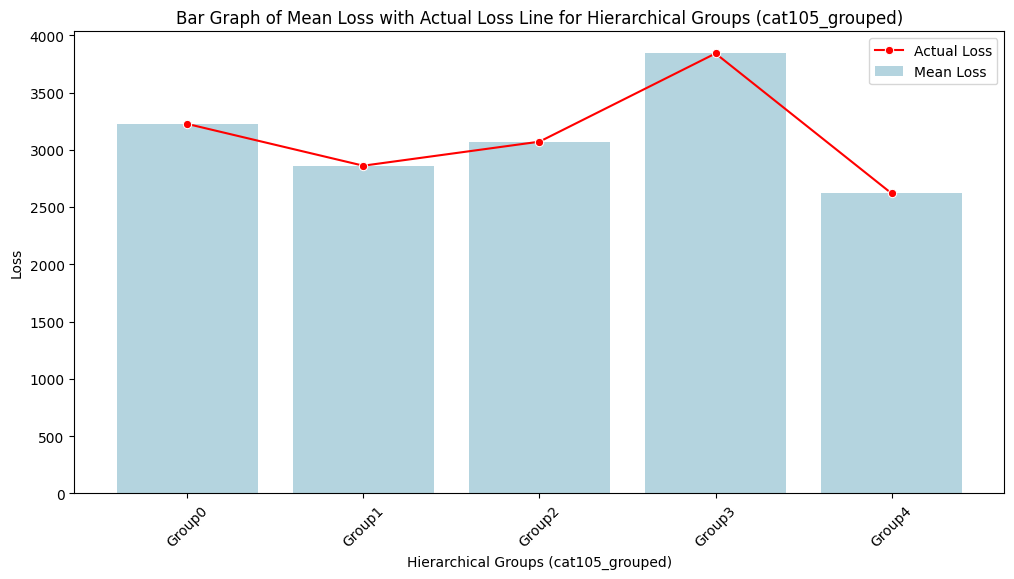

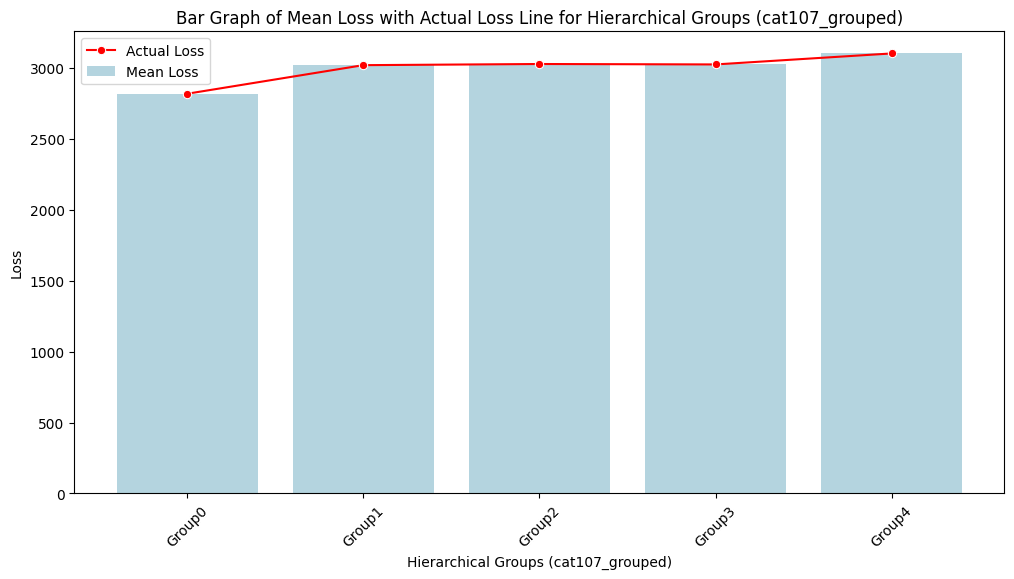

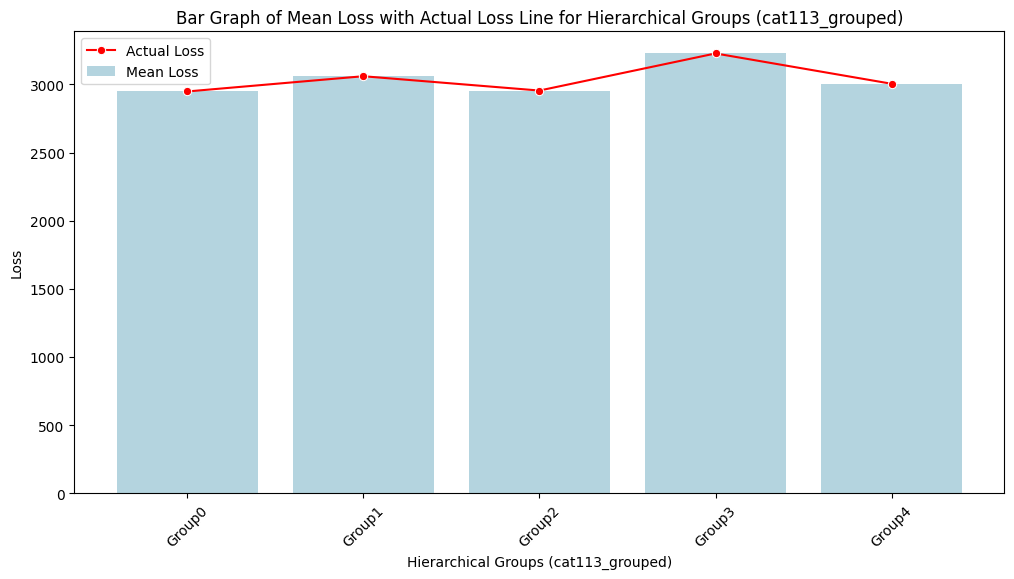

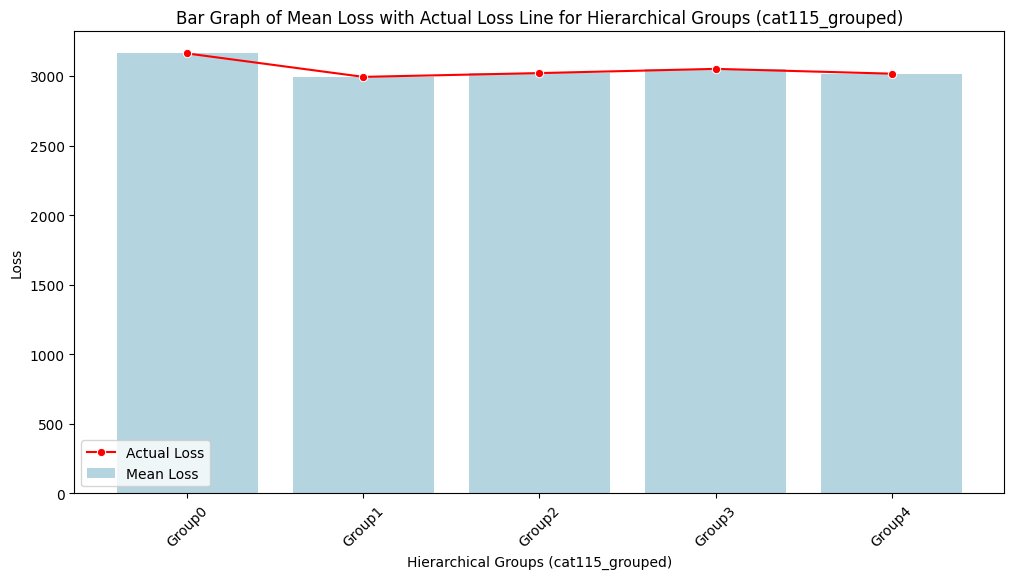

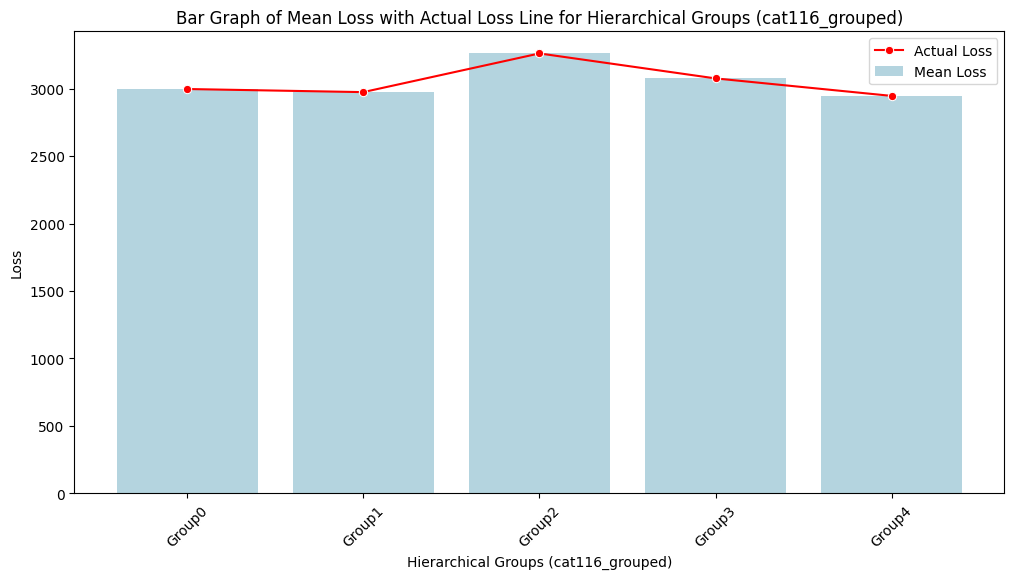

In [ ]:
def plot_mean_loss_by_group(df, grouped_column):

    mean_loss = df.groupby(grouped_column)['loss'].mean().reset_index()


    plt.figure(figsize=(12, 6))

    sns.barplot(x=grouped_column, y='loss', data=mean_loss, color='lightblue', label='Mean Loss')


    sns.lineplot(x=grouped_column, y='loss', data=mean_loss, color='red', marker='o', label='Actual Loss')


    plt.title(f'Bar Graph of Mean Loss with Actual Loss Line for Hierarchical Groups ({grouped_column})')
    plt.xlabel(f'Hierarchical Groups ({grouped_column})')
    plt.ylabel('Loss')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

def encode_and_cluster(df, column_name, n_clusters=5):
    le = LabelEncoder()
    df[f'{column_name}_encoded'] = le.fit_transform(df[column_name])

    kmeans = KMeans(n_clusters=n_clusters)
    df[f'{column_name}_cluster'] = kmeans.fit_predict(df[[f'{column_name}_encoded']])

    df[f'{column_name}_grouped'] = df[f'{column_name}_cluster'].map(lambda x: f'Group{x}')

    return df


# columns_to_cluster = ["cat89", "cat92", "cat99", "cat101", "cat102", "cat105", "cat107", 'cat109', 'cat110', "cat111", 'cat112', 'cat113', 'cat114', 'cat115', 'cat116']

for column in columns_to_cluster:
    df = encode_and_cluster(df, column, n_clusters=5)


for column in columns_to_cluster:
    grouped_column = f'{column}_grouped'
    if grouped_column in df.columns:
        plot_mean_loss_by_group(df, grouped_column)

In [ ]:
grouped_cat = ["cat89_grouped","cat101_grouped", "cat102_grouped", "cat105_grouped", "cat107_grouped",'cat113_grouped','cat115_grouped','cat116_grouped']
columns_to_include = new_columns + grouped_cat
columns_to_include

['cat7',
 'cat57',
 'cat89_grouped',
 'cat101_grouped',
 'cat102_grouped',
 'cat105_grouped',
 'cat107_grouped',
 'cat113_grouped',
 'cat115_grouped',
 'cat116_grouped']